In [12]:
import numpy as np
import sklearn
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Question 7

In [4]:
dim = 9
def data_generator ( seed , n , dim ):
    mu1 = [1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0]
    mu2 = [0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1]
    mu3 = [0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0]
    sigma1 = np.diag([1 , 1 , 1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1])
    sigma2 = np.diag([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 1 , 1 , 1])
    sigma3 = np.diag([0.1 , 0.1 , 0.1 , 1 , 1 , 1 , 0.1 , 0.1 , 0.1])
    np.random . seed( seed )
    rand_int = np.random . choice ([1 , 2 , 3], size = n )
    unique_values , counts = np.unique ( rand_int , return_counts = True )
    datapoints = np.zeros (( 0 , dim ) )
    labels = np.array ([])
    for i , ( uv , mu , sigma ) in enumerate (zip ( unique_values , [mu1 , mu2 , mu3 ], [
    sigma1 , sigma2 , sigma3 ]) ):
        datapoints = np.vstack (( datapoints , np.random . multivariate_normal ( mu ,
        sigma , size = counts [i]) ) )
        labels = np.hstack (( labels , uv*np.ones ( counts [i]) ) )
    shuff = np.random . permutation (len( labels ) )
    return datapoints [ shuff ], labels [ shuff ]

In [5]:
sample_sizes = [100, 200, 300, 400, 500]
num_datasets = 100
avg_rand_indices = [] # record random indices
std_devs = [] # store std deviations

#### a)

In [6]:
for n in sample_sizes:
   rand_indices = []
   # Generate 100 datasets with different seeds
   for seed in range(100):
       datapoints, labels = data_generator(seed+1, n, 9)
       # KMeans clustering
       kmeans = KMeans(n_clusters=3, random_state=seed)
       kmeans.fit(datapoints)
       # Calculate the Rand Index
       rand_index = adjusted_rand_score(labels, kmeans.labels_)
       rand_indices.append(rand_index)
   # Calculate average Rand Indices
   avg_rand_index = np.mean(rand_indices)
   # Calculate standard deviation
   std_dev = np.std(rand_indices)
   avg_rand_indices.append(avg_rand_index)
   std_devs.append(std_dev)
 

c:\Python3.11\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Python3.11\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python3.11\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python3.11\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python3.11\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

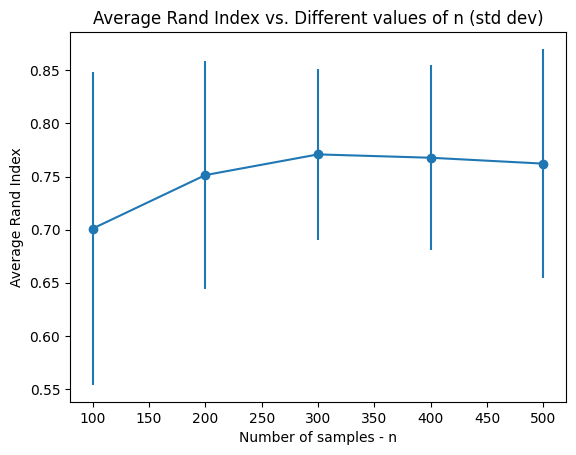

In [11]:
# Plot
plt.errorbar(sample_sizes, avg_rand_indices, yerr=std_devs, fmt='-o')
plt.xlabel('Number of samples - n')
plt.ylabel('Average Rand Index')
plt.title('Average Rand Index vs. Different values of n (std dev)')
plt.show()

#### b)

In [13]:
avg_rand_indices_pca = []
std_devs_pca = []
for n in sample_sizes:
   rand_indices_pca = []
   # Generate 100 datasets with different seeds
   for seed in range(1, 101):
       datapoints, labels = data_generator(seed, n, 9)
       # Perform PCA with 3 principal components
       pca = PCA(n_components=3, random_state=seed)
       projected_datapoints = pca.fit_transform(datapoints)
       # Perform KMeans clustering 
       kmeans = KMeans(n_clusters=3, random_state=seed)
       kmeans.fit(projected_datapoints)
       # Calculate the Rand Index
       rand_index_pca = adjusted_rand_score(labels, kmeans.labels_)
       rand_indices_pca.append(rand_index_pca)
   avg_rand_index_pca = np.mean(rand_indices_pca)
   std_dev_pca = np.std(rand_indices_pca)
   avg_rand_indices_pca.append(avg_rand_index_pca)
   std_devs_pca.append(std_dev_pca)

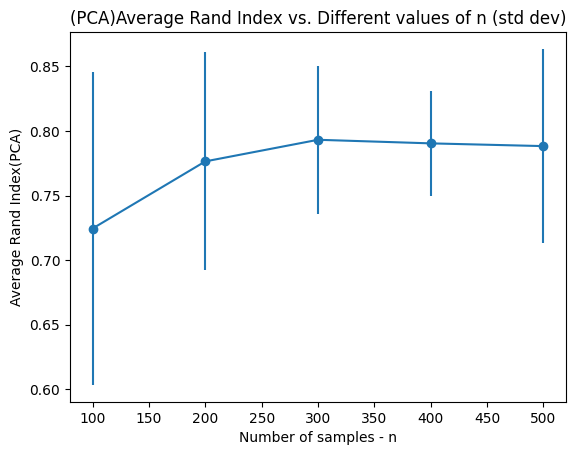

In [15]:
# plot
plt.errorbar(sample_sizes, avg_rand_indices_pca, yerr=std_devs_pca, fmt='-o')
plt.xlabel('Number of samples - n')
plt.ylabel('Average Rand Index(PCA)')
plt.title('(PCA)Average Rand Index vs. Different values of n (std dev)')
plt.show()

#### c)

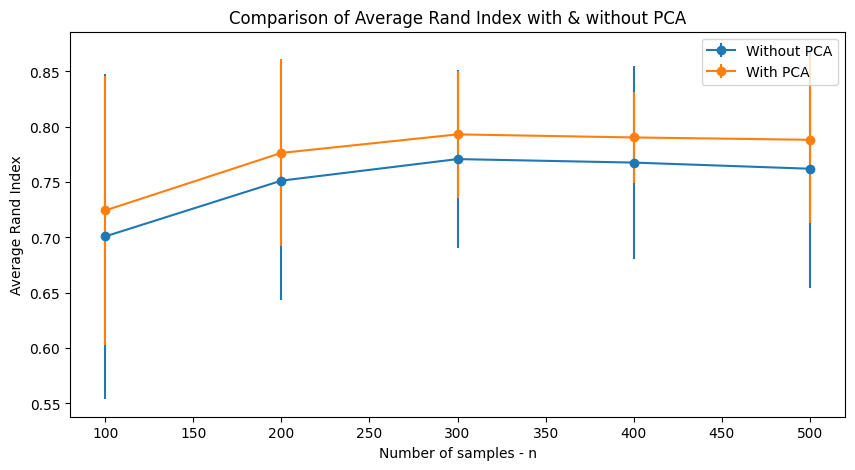

In [17]:
plt.figure(figsize=(10, 5))
plt.errorbar(sample_sizes, avg_rand_indices, yerr=std_devs, fmt='-o', label='Without PCA')
plt.errorbar(sample_sizes, avg_rand_indices_pca, yerr=std_devs_pca, fmt='-o', label='With PCA')
plt.xlabel('Number of samples - n')
plt.ylabel('Average Rand Index')
plt.title('Comparison of Average Rand Index with & without PCA')
plt.legend()
plt.show()

The standard deviation of clustering performance on Kmeans with PCA is way better than without PCA. This indicates that the PCA was able to reduce the dimensionality of the data, and keep the most important information for clustering. The improvement on performance also can tell the original data had a lot of noise that PCA helper to filter out.

### Question 8

In [71]:
from sklearn.cluster import MeanShift , KMeans , SpectralClustering
import matplotlib . pyplot as plt
from scipy.spatial.distance import pdist
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

In [20]:
import random
import math
random . seed ( 0 )
## Data set 1
X1 = []
for i in range ( 1000 ):
    theta = random . uniform (0 , 2* math .pi)
    radius = random . gauss (0 , 0.2 )+ random . choice ([1 , 3])
    X1 . append ([ radius * math . cos( theta ) , radius * math . sin( theta )])
X1 = np . array ( X1 )
## Data Set 2
X2 = []
for i in range ( 1000 ):
    theta = random . uniform (0 , 2* math .pi)
    radius = random . gauss (0 , 0.1 ) + 2
    if theta < math .pi:
        X2 . append ([ radius * math . cos( theta )-1 , radius * math . sin( theta )])
    else :
        X2 . append ([ radius * math . cos( theta )+1 , radius * math . sin( theta )])
X2 = np . array ( X2 )
## Data Set 3
X3 = []
for i in range ( 1000 ):
    radius = random . gauss (0 , 1 )
    theta = random . uniform (0 , 2* math .pi)
    center = random . choice ([[0 , 1],[3 , 3],[1 ,-3]])
    X3 . append ([ radius * math . cos( theta )+ center [0], radius * math . sin( theta )+ center
    [1]])
X3 = np . array ( X3 )

In [79]:
def my_plot(X, label_pred, method:str):
    mark = ['or ', 'ob ', 'oy ', 'g','c','m','k','w']
    label_pred[label_pred >= len(mark)] = -1
    j = 0
    for i in label_pred :
        if i != -1:
            plt.plot ([X[j:j+1 , 0]], [X[j:j+1 , 1]], mark [i], markersize = 5 )
        j +=1
    plt.title(method)
    plt . ylabel ('Dimension 1')
    plt . xlabel ('Dimension 2')
    plt . show ()

In [102]:
def do_3_clusterings(X, k=2):
    # X = StandardScaler().fit_transform(X)
    # MeanShift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.2)
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(X)
    ms = ms.labels_
    # Kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    km = kmeans.labels_
    # Spectral
    spectral = SpectralClustering(n_clusters=k,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=42)
    spectral.fit(X)
    sc = spectral.labels_
    return X, ms, km, sc

#### Dataset1

In [103]:
X, ms, km, sc = do_3_clusterings(X1)
d1 = [X, ms, km, sc]
# my_plot(X, ms, "MeanShift")
# my_plot(X, km, "Kmeans")
# my_plot(X, sc, "SpectralClustering")

c:\Python3.11\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [104]:
X, ms, km, sc = do_3_clusterings(X2)
d2 = [X, ms, km, sc]
# my_plot(X, ms, "MeanShift")
# my_plot(X, km, "Kmeans")
# my_plot(X, sc, "SpectralClustering")

c:\Python3.11\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [105]:
X, ms, km, sc = do_3_clusterings(X3, k=3)
d3 = [X, ms, km, sc]
# my_plot(X, ms, "MeanShift")
# my_plot(X, km, "Kmeans")
# my_plot(X, sc, "SpectralClustering")

In [ ]:
def my_plot(X, label_pred, method:str):
    mark = ['or ', 'ob ', 'oy ', 'g','c','m','k','w']
    label_pred[label_pred >= len(mark)] = -1
    j = 0
    for i in label_pred :
        if i != -1:
            plt.plot ([X[j:j+1 , 0]], [X[j:j+1 , 1]], mark [i], markersize = 5 )
        j +=1
    plt.title(method)
    plt . ylabel ('Dimension 1')
    plt . xlabel ('Dimension 2')
    plt . show ()

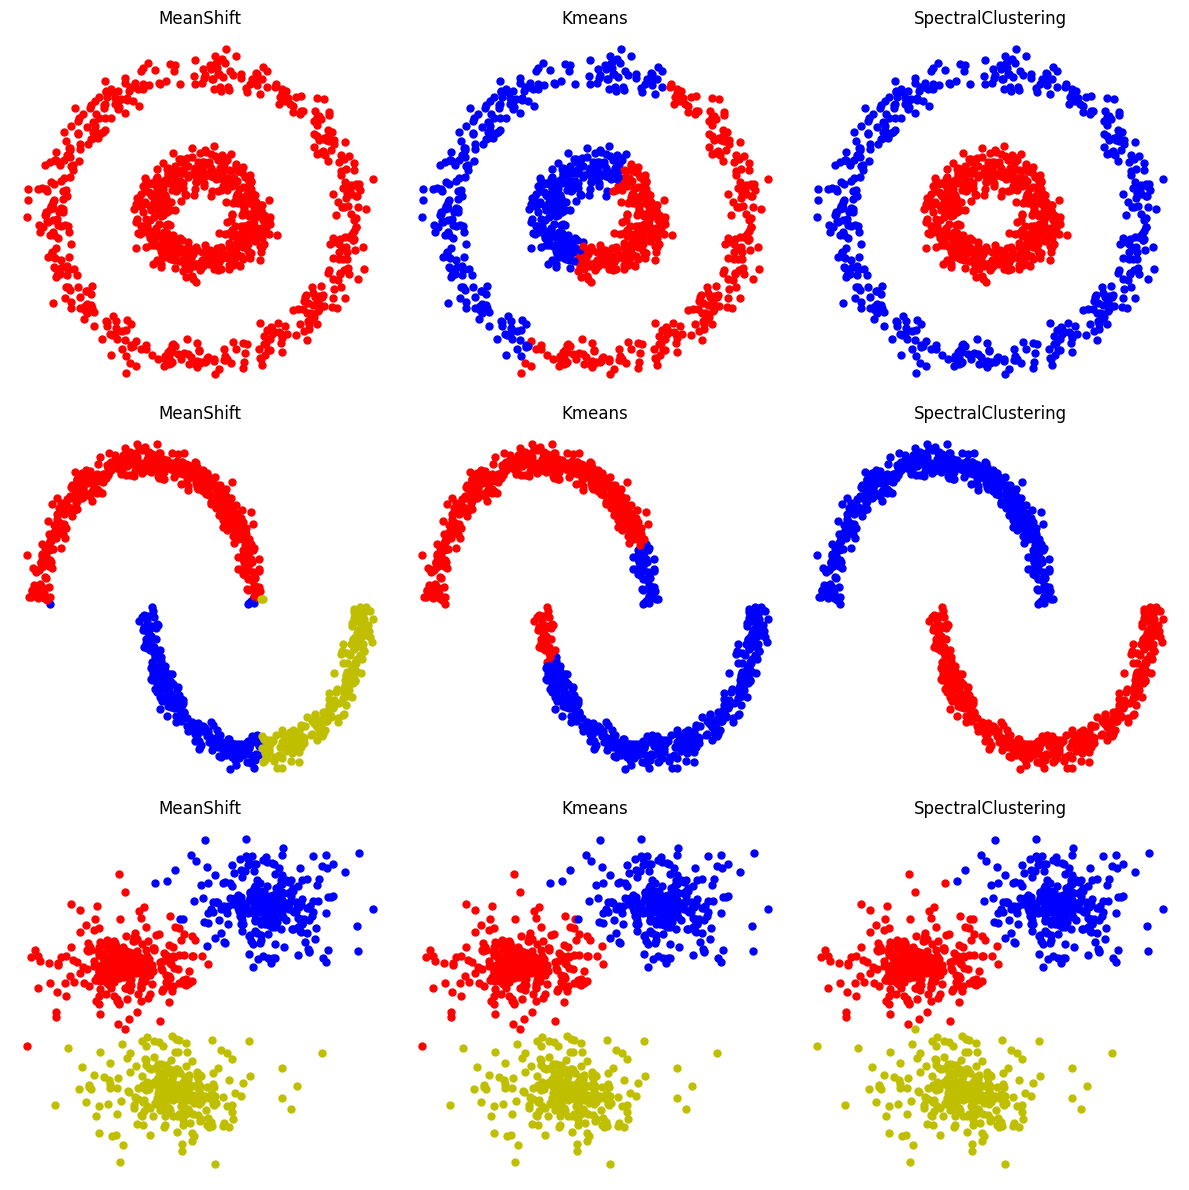

In [106]:
all_d = [d1, d2, d3]

mark = ['or ', 'ob ', 'oy ', 'g','c','m','k','w']
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, d in enumerate(all_d):
    axs[i, 0].set_title(f"MeanShift")  
    axs[i, 0].axis('off')
    j = 0
    X = d[0]
    for t in d[1]:
        axs[i, 0].plot([X[j:j+1 , 0]], [X[j:j+1 , 1]],  mark[t], markersize=5)
        j +=1

    axs[i, 1].set_title(f"Kmeans")  
    axs[i, 1].axis('off')
    j = 0
    for t in d[2]:
        axs[i, 1].plot([X[j:j+1 , 0]], [X[j:j+1 , 1]],  mark[t], markersize=5)
        j +=1

    axs[i, 2].set_title(f"SpectralClustering")  
    axs[i, 2].axis('off')
    j = 0
    for t in d[3]:
        axs[i, 2].plot([X[j:j+1 , 0]], [X[j:j+1 , 1]],  mark[t], markersize=5)
        j +=1

plt.tight_layout()
plt.show()